In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
from pathlib import Path
# load csv data
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

flowersPath = Path('/content/gdrive/Othercomputers/DavideLaptop/Desktop/IrisClassification')
iris = pd.read_csv(Path('/content/gdrive/Othercomputers/DavideLaptop/Desktop/IrisClassification/iris.csv'))

Mounted at /content/gdrive/


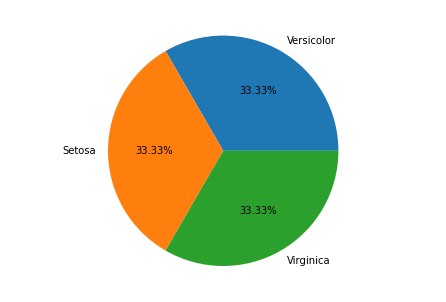

In [107]:
versicolors = len(iris[iris['species'] == 'versicolor'])
virginica = len(iris[iris['species'] == 'virginica'])
setosa =  len(iris[iris['species'] == 'setosa'])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
classes = ['Versicolor', 'Setosa', 'Virginica']
s = [versicolors,setosa,virginica]
ax.pie(s, labels = classes,autopct='%1.2f%%')
plt.show()

In [105]:
X = iris.drop('species', axis=1)

In [102]:
y = iris['species']

In [104]:
y.unique()
print(sum)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [62]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()

In [63]:
y = encoder.fit_transform(y)

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [66]:
scaler = MinMaxScaler()

In [67]:
scaler.fit(X_train)

MinMaxScaler()

In [68]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [69]:
import tensorflow as tf
import keras

In [70]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import keras
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=10)

model = Sequential()

model.add(Dense(units=4, activation='relu', input_shape=[4,]))
model.add(Dense(units=4, activation='relu', input_shape=[4,]))
model.add(Dense(units=4, activation='relu', input_shape=[4,]))
model.add(Dense(units=4, activation='relu', input_shape=[4,]))

model.add(Dense(units=3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

model.fit(x=scaled_X_train, y=y_train, epochs=300, validation_data=(scaled_X_test, y_test), callbacks=[early_stop])


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 4)                 20        
                                                                 
 dense_31 (Dense)            (None, 4)                 20        
                                                                 
 dense_32 (Dense)            (None, 4)                 20        
                                                                 
 dense_33 (Dense)            (None, 4)                 20        
                                                                 
 dense_34 (Dense)            (None, 3)                 15        
                                                                 
Total params: 95
Trainable params: 95
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
4/4 [==============================] - 1s 67ms

metrics = pd.DataFrame(model.history.history)

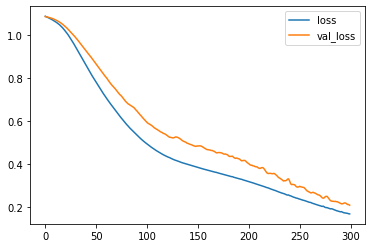

In [71]:
loss_history = pd.DataFrame(model.history.history)
loss_history[['loss', 'val_loss']].plot()

In [72]:
model.evaluate(scaled_X_test, y_test, verbose=0)


[0.20914530754089355, 0.9555555582046509]

In [77]:
epochs = len(loss_history)
print(epochs)

300


In [78]:
scaled_X = scaler.fit_transform(X)

In [79]:
model = Sequential()

model.add(Dense(units=4, activation='relu', input_shape=[4,]))
model.add(Dense(units=4, activation='relu', input_shape=[4,]))
model.add(Dense(units=4, activation='relu', input_shape=[4,]))
model.add(Dense(units=4, activation='relu', input_shape=[4,]))

model.add(Dense(units=3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [84]:
model.fit(scaled_X, y, epochs=epochs)

Epoch 1/300
5/5 [==============================] - 1s 4ms/step - loss: 1.0974 - accuracy: 0.3533
Epoch 2/300
5/5 [==============================] - 0s 3ms/step - loss: 1.0972 - accuracy: 0.3667
Epoch 3/300
5/5 [==============================] - 0s 4ms/step - loss: 1.0969 - accuracy: 0.3533
Epoch 4/300
5/5 [==============================] - 0s 4ms/step - loss: 1.0967 - accuracy: 0.3467
Epoch 5/300
5/5 [==============================] - 0s 4ms/step - loss: 1.0965 - accuracy: 0.3400
Epoch 6/300
5/5 [==============================] - 0s 3ms/step - loss: 1.0963 - accuracy: 0.3400
Epoch 7/300
5/5 [==============================] - 0s 3ms/step - loss: 1.0959 - accuracy: 0.3533
Epoch 8/300
5/5 [==============================] - 0s 3ms/step - loss: 1.0957 - accuracy: 0.4533
Epoch 9/300
5/5 [==============================] - 0s 3ms/step - loss: 1.0953 - accuracy: 0.4800
Epoch 10/300
5/5 [==============================] - 0s 3ms/step - loss: 1.0949 - accuracy: 0.4533
Epoch 11/300
5/5 [===========

In [88]:
import joblib
joblib.dump(scaler, 'iris_classifier.pkl')
model.save("iris_classifier.h5")

In [89]:
from keras.models import load_model
iris_classifier = load_model('iris_classifier.h5')
flower_scaler = joblib.load("iris_classifier.pkl")

In [90]:
flower_test = {"sepal_length": 5.6,
                  "sepal_width": 2.9,
                  "petal_length": 4,
                  "petal_width": 1.2}

In [91]:
import numpy as np

def get_iris_prediction(model, scaler, request):
    sepal_length = request["sepal_length"]
    sepal_width = request["sepal_width"]
    petal_length = request["petal_length"]
    petal_width = request["petal_width"]
    
    flower = [[sepal_length, sepal_width, petal_length, petal_width]]
    flower = scaler.transform(flower)
    
    iris_classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    prediction = model.predict(flower)
    class_index = np.argmax(prediction, axis=1)
    print(iris_classes[class_index])

get_iris_prediction(iris_classifier, flower_scaler, flower_test)


['versicolor']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


## Confusion matrix

In [100]:
# Plot non-normalized confusion matrix
import numpy as np
import matplotlib.pyplot as plt
class_names = iris['species']

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        display_labels=class_names,
        # cmap=plt.cm.Blues,
        # normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

ValueError: ignored